In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

### Data loading

In [8]:
df = pd.read_csv('customer-churn.csv')
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
3157,3030-YZADT,Male,0,No,No,9,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Mailed check,44.95,431,Yes
6498,0742-NXBGR,Female,0,No,No,1,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,82.30,82.3,Yes
4139,7278-CKDNC,Male,1,No,No,24,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,80.50,2088.45,No
4530,1945-XISKS,Female,0,Yes,No,67,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.65,1335.2,No
6775,3259-KNMRR,Male,1,No,No,57,Yes,Yes,DSL,No,...,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic),79.75,4438.2,No


#### Data preprocessing

In [9]:
df.drop('customerID', axis = 1 ,inplace = True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [10]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [11]:
pd.to_numeric(df.TotalCharges, errors = 'coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [12]:
pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [13]:
df[pd.to_numeric(df.TotalCharges, errors = 'coerce').isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [18]:
df.shape

(7043, 20)

In [17]:
df1 = df[df.TotalCharges != " "]
df1.shape

(7032, 20)

In [19]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [21]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

c:\users\hebbar\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [22]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

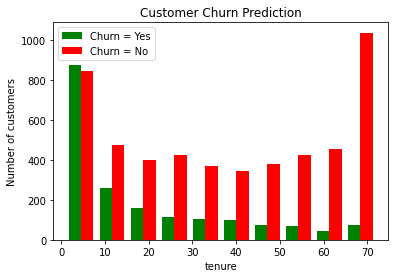

In [29]:
tenure_churn_no = df1[df1.Churn == 'No'].tenure
tenure_churn_yes = df1[df1.Churn == 'Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number of customers")
plt.title('Customer Churn Prediction')
plt.hist([tenure_churn_yes,tenure_churn_no], color=['green','red'],label =['Churn = Yes','Churn = No'])
plt.legend()

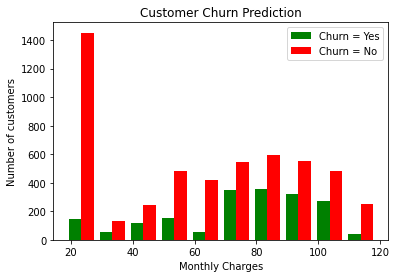

In [30]:
mc_churn_no = df1[df1.Churn == 'No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn == 'Yes'].MonthlyCharges

plt.xlabel("Monthly Charges")
plt.ylabel("Number of customers")
plt.title('Customer Churn Prediction')
plt.hist([mc_churn_yes,mc_churn_no], color=['green','red'],label =['Churn = Yes','Churn = No'])
plt.legend()

In [33]:
for c in df:
    print(c)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
InternetService
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
Contract
PaperlessBilling
PaymentMethod
MonthlyCharges
TotalCharges
Churn


In [35]:
for c in df:
    print(f'{c} :  {df[c].unique()}')

gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :  [29.85 56.95 53

In [37]:
def print_unique_col_values(df):
    for c in df:
        if df[c].dtypes == 'object':
            print(f'{c} :  {df[c].unique()}')

In [38]:
print_unique_col_values(df1)

gender :  ['Female' 'Male']
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No phone service' 'No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes' 'No internet service']
OnlineBackup :  ['Yes' 'No' 'No internet service']
DeviceProtection :  ['No' 'Yes' 'No internet service']
TechSupport :  ['No' 'Yes' 'No internet service']
StreamingTV :  ['No' 'Yes' 'No internet service']
StreamingMovies :  ['No' 'Yes' 'No internet service']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :  ['No' 'Yes']


In [41]:
df1.replace('No internet service','No',inplace = True)
df1.replace('No phone service','No',inplace = True)

In [42]:
print_unique_col_values(df1)

gender :  ['Female' 'Male']
Partner :  ['Yes' 'No']
Dependents :  ['No' 'Yes']
PhoneService :  ['No' 'Yes']
MultipleLines :  ['No' 'Yes']
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  ['No' 'Yes']
OnlineBackup :  ['Yes' 'No']
DeviceProtection :  ['No' 'Yes']
TechSupport :  ['No' 'Yes']
StreamingTV :  ['No' 'Yes']
StreamingMovies :  ['No' 'Yes']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  ['Yes' 'No']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn :  ['No' 'Yes']


### converting text to binary

In [43]:
yes_no_cols = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for c in yes_no_cols:
    df1[c].replace({'Yes':1,'No':0},inplace = True)


c:\users\hebbar\appdata\local\programs\python\python39\lib\site-packages\pandas\core\generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [44]:
print_unique_col_values(df1)

gender :  ['Female' 'Male']
InternetService :  ['DSL' 'Fiber optic' 'No']
Contract :  ['Month-to-month' 'One year' 'Two year']
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [45]:
for c in df1:
    print(f'{c} :  {df1[c].unique()}')

gender :  ['Female' 'Male']
SeniorCitizen :  [0 1]
Partner :  [1 0]
Dependents :  [0 1]
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :  [0 1]
MultipleLines :  [0 1]
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  [0 1]
OnlineBackup :  [1 0]
DeviceProtection :  [0 1]
TechSupport :  [0 1]
StreamingTV :  [0 1]
StreamingMovies :  [0 1]
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  [1 0]
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :  [0 1]


In [50]:
df1["gender"].replace({'Female':1,'Male':0},inplace = True)

In [51]:
for c in df1:
    print(f'{c} :  {df1[c].unique()}')

gender :  [1 0]
SeniorCitizen :  [0 1]
Partner :  [1 0]
Dependents :  [0 1]
tenure :  [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService :  [0 1]
MultipleLines :  [0 1]
InternetService :  ['DSL' 'Fiber optic' 'No']
OnlineSecurity :  [0 1]
OnlineBackup :  [1 0]
DeviceProtection :  [0 1]
TechSupport :  [0 1]
StreamingTV :  [0 1]
StreamingMovies :  [0 1]
Contract :  ['Month-to-month' 'One year' 'Two year']
PaperlessBilling :  [1 0]
PaymentMethod :  ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges :  [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges :  [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn :  [0 1]


In [54]:
df2 = pd.get_dummies(data=df1,columns=['InternetService', 'Contract','PaymentMethod'])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [55]:
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [56]:
for c in df2:
    print(c)

gender
SeniorCitizen
Partner
Dependents
tenure
PhoneService
MultipleLines
OnlineSecurity
OnlineBackup
DeviceProtection
TechSupport
StreamingTV
StreamingMovies
PaperlessBilling
MonthlyCharges
TotalCharges
Churn
InternetService_DSL
InternetService_Fiber optic
InternetService_No
Contract_Month-to-month
Contract_One year
Contract_Two year
PaymentMethod_Bank transfer (automatic)
PaymentMethod_Credit card (automatic)
PaymentMethod_Electronic check
PaymentMethod_Mailed check


In [57]:
df2.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1


In [58]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

#### scaling

In [60]:
scale_cols = ['tenure','MonthlyCharges','TotalCharges']
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[scale_cols] = scaler.fit_transform(df2[scale_cols])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,0,1,1,0.323944,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,1,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,1,0,1,1,0.140845,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,0,1,1,0,0.042254,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [61]:
for c in df2:
    print(f'{c} :  {df2[c].unique()}')

gender :  [1 0]
SeniorCitizen :  [0 1]
Partner :  [1 0]
Dependents :  [0 1]
tenure :  [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService :  [0 1]
MultipleLines :  [0 1]
OnlineSecurity :  [0 1]
OnlineBackup :  [1 0]
DeviceProtection :  

In [62]:
x = df2.drop(['Churn'],axis=1)
y = df2['Churn']

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=5)
    

In [64]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((5625, 26), (1407, 26), (5625,), (1407,))

In [65]:
import tensorflow as tf
from tensorflow import keras

In [70]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,),activation='relu'),
    
    keras.layers.Dense(1,activation='sigmoid'),
    
])

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics=['accuracy'])

model.fit(x_train,y_train,epochs= 100)

Epoch 1/100
176/176 [==============================] - 0s 683us/step - loss: 0.5401 - accuracy: 0.7271
Epoch 2/100
176/176 [==============================] - 0s 678us/step - loss: 0.4388 - accuracy: 0.7908
Epoch 3/100
176/176 [==============================] - 0s 653us/step - loss: 0.4232 - accuracy: 0.8002
Epoch 4/100
176/176 [==============================] - 0s 647us/step - loss: 0.4174 - accuracy: 0.8046
Epoch 5/100
176/176 [==============================] - 0s 657us/step - loss: 0.4140 - accuracy: 0.8062
Epoch 6/100
176/176 [==============================] - 0s 742us/step - loss: 0.4113 - accuracy: 0.8080
Epoch 7/100
176/176 [==============================] - 0s 642us/step - loss: 0.4094 - accuracy: 0.8103
Epoch 8/100
176/176 [==============================] - 0s 662us/step - loss: 0.4088 - accuracy: 0.8087
Epoch 9/100
176/176 [==============================] - 0s 651us/step - loss: 0.4067 - accuracy: 0.8096
Epoch 10/100
176/176 [==============================] - 0s 645us/step - l

176/176 [==============================] - 0s 660us/step - loss: 0.3805 - accuracy: 0.8220
Epoch 80/100
176/176 [==============================] - 0s 714us/step - loss: 0.3806 - accuracy: 0.8180
Epoch 81/100
176/176 [==============================] - 0s 691us/step - loss: 0.3802 - accuracy: 0.8203
Epoch 82/100
176/176 [==============================] - 0s 702us/step - loss: 0.3801 - accuracy: 0.8190
Epoch 83/100
176/176 [==============================] - 0s 697us/step - loss: 0.3804 - accuracy: 0.8212
Epoch 84/100
176/176 [==============================] - 0s 659us/step - loss: 0.3800 - accuracy: 0.8194
Epoch 85/100
176/176 [==============================] - 0s 655us/step - loss: 0.3800 - accuracy: 0.8206
Epoch 86/100
176/176 [==============================] - 0s 720us/step - loss: 0.3787 - accuracy: 0.8199
Epoch 87/100
176/176 [==============================] - 0s 691us/step - loss: 0.3793 - accuracy: 0.8217
Epoch 88/100
176/176 [==============================] - 0s 632us/step - loss:

In [71]:
model.evaluate(x_test,y_test)

44/44 [==============================] - 0s 668us/step - loss: 0.4577 - accuracy: 0.7818


[0.45768091082572937, 0.7818052768707275]

In [72]:
yp = model.predict(x_test)
yp[:5]

array([[0.20648846],
       [0.42626253],
       [0.00806835],
       [0.66240114],
       [0.5448568 ]], dtype=float32)

In [73]:
y_pred = []
for i in yp:
    if i >0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)


In [75]:
y_pred[:5],y_test[:5]

([0, 0, 0, 1, 1],
 2660    0
 744     0
 5579    1
 64      1
 3287    1
 Name: Churn, dtype: int64)

In [76]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       999
           1       0.67      0.50      0.57       408

    accuracy                           0.78      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.77      0.78      0.77      1407



Text(69.0, 0.5, 'Truth')

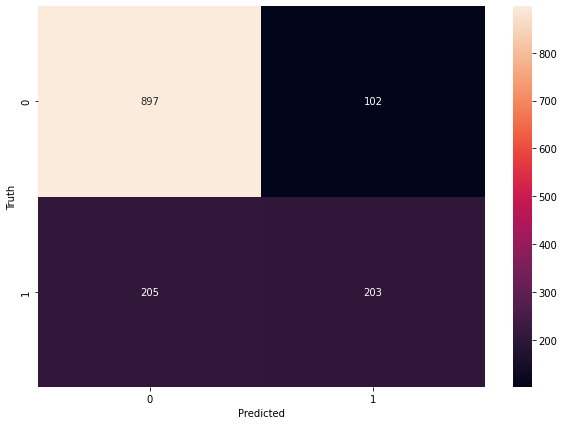

In [78]:
import seaborn as sns
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


In [79]:
#accuracy
round((897+203)/(897+203+205+102),2)

0.78

In [81]:
#precision for 0 class
round(897/(897+205),2)

0.81

In [83]:
#precision for 1 class
round(203/(102+203),2)

0.67

In [84]:
#recall for class 0
round((897)/(897+102),2)

0.9

In [85]:
#recall for class 1
round((205)/(205+203),2)

0.5